<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_Surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 ch9. 8 pg.607~624

## 08 파이썬 추천 시스템 패키지 - Surprise

### Surprise 패키지



- 다양한 추천 알고리즘. 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있음.

- Surprise 의 핵심 API는 사이킷런의 핵심 API와 유사한 API명으로 작성됨. 예를 들어 fit(), predict() API로 추천 데이터 학습과 예측, train_test_split()으로 추천 학습 테이터 세트와 예측 데이터 세트 분리, cross_validate(), GridSearchCV 클래스를 통해 추천 시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능을 제공함.

https://surprise.readthedocs.io/en/stable/

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Surprise를 이용한 추천 시스템 구축

In [7]:
from surprise import SVD
from surprise import Dataset # 데이터 로딩
from surprise import accuracy
from surprise.model_selection import train_test_split

In [8]:
# load_builtin(): 무비렌즈 사이트에서 제공하는 과거 버전 데이터 세트
data = Dataset.load_builtin('ml-100k', prompt=False) 
trainset, testset = train_test_split(data, test_size = .25, random_state = 0)

In [ ]:
algo = SVD()
algo.fit(trainset)

- surprise에서 추천을 예측하는 메서드: test(), predict()

- **test()**: 사용자-아이템 평점 데이터 세트 **전체**에 대해 추천 예측

- **predict()**: **개별** 사용자와 영화에 대한 추천 평점 반환

In [ ]:
# test 메서드 이용 - 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해서 predict()를 반복적으로 수행
predictions = algo.test(testset)
print('prediction type:', type(predictions), ' size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]
# Prediction 객체: Suprise 패키지에서 제공하는 데이터 타입
# uid (개별 사용자 아이디), idd(영화(아이템) 아이디), r_ui(실제 평점), est(추천 예측 평점)
# details: 내부 처리 시 추천 예측을 할 수 없는 경우에 로그용으로 데이터를 남기는데 사용됨
# was_possible = True: 예측값을 생성할 수 없는 데이터

prediction type: <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.629191010385274, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=4.046359299763607, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.143870410761385, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.683057259097455, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.4714965349257243, details={'was_impossible': False})]

In [ ]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('120', '282', 3.629191010385274),
 ('882', '291', 4.046359299763607),
 ('535', '507', 4.143870410761385)]

In [ ]:
# predict 메서드 이용
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함.
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.43   {'was_impossible': False}


In [ ]:
accuracy.rmse(predictions)

RMSE: 0.9499


0.9499196095442413

### Surprise 주요 모듈 소개

- Dataset: 데이터 세트의 칼럼 순서는 반드시 사용자 아이디, 아이템 아이디, 평점 순으로 되어 있어야 함.

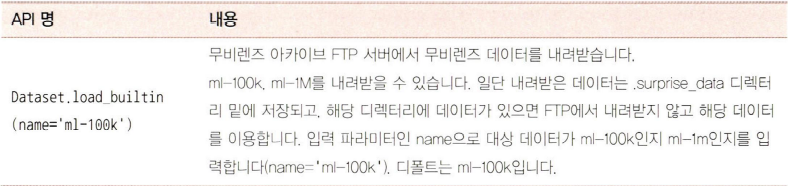

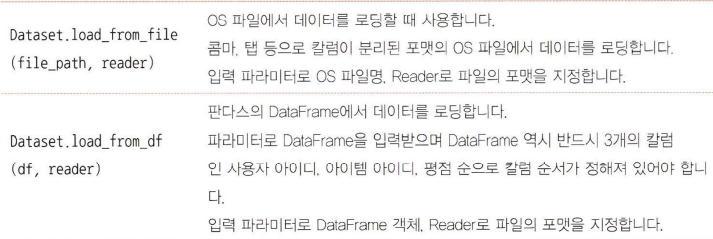

### OS 파일 데이터를 Surprise 데이터 세트로 로딩

- 로딩되는 데이터 파일에 칼럼명을 가지는 **헤더 문자열이 있어서는 안됨**.

In [10]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [12]:
from surprise import Reader
reader = Reader(line_format='user item rating timestamp', sep=",", rating_scale=(0.5,5))
data = Dataset.load_from_file('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings_noh.csv', reader=reader)

### Reader 클래스

- **line_format** (string): 칼럼을 순서대로 나열함. 입력된 문자열을 공백으로 분리해 칼럼으로 인식함.

- **sep** (char): 칼럼을 분리하는 분리자. (default: \t) 판다스 데이터프레임에서 입력받을 경우에는 기재할 필요X

- **rating_scale** (tuple, optional): 평점 값의 최소 ~ 최대 평점을 설정함. (default: (1,5)) 

In [13]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### 판다스 DataFrame에서 Surprise 데이터 세트로 로딩

In [14]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5))

# ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함.
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Surprise 추천 알고리즘 클래스

- SVD : 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘

- KNNBasic: 최근접 이웃 협업 필터링을 위한 KNN 알고리즘

- BaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘

SVD 클래스의 입력 파라미터

- **n_factors**: 잠재 요인 K의 개수 (default:100) 커질수록 정확도가 높아질 수 있으나 과적합 문제 발생 가능

- **n_epochs**: SGD(Stochastic Gradient Descent) 수행 시 반복 횟수 (default:20)

- **biased**: 베이스라인 사용자 편향 적용 여부(bool, default:True)

- SVD++ 알고리즘이 성능은 좋으나 시간이 너무 오래 걸림.

- 다음으로는 SVD와 k-NN Baseline이 가장 성능 수치가 좋음.


### 베이스라인 평점

- **베이스라인 평점**: 한 개인의 성향을 반영해 아이템 평가에 편향성 (bias) 요소를 반영하여 평점을 부과하는 것

ex. 싫은 소리를 별로 안하는 사람의 경우 전반적으로 평가에 후한 경향이 있음.


- **전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수**

전체 평균 평점 = 모든 사용자의 아이템에 대한 평점의 평균

사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점

아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

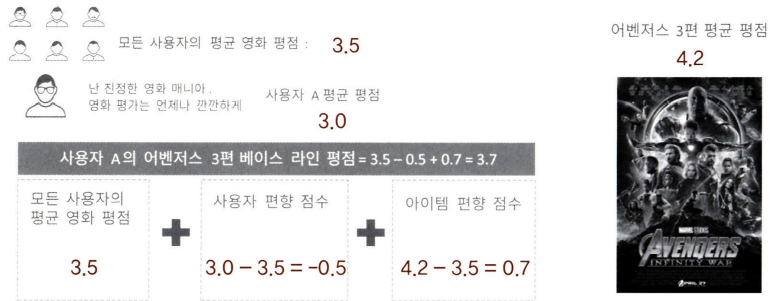

### 교차 검증과 하이퍼 파라미터 튜닝

In [16]:
from surprise.model_selection import cross_validate

ratings = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings.csv')
reader = Reader(rating_scale=(0.5,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8641  0.8842  0.8845  0.8687  0.8668  0.8737  0.0088  
MAE (testset)     0.6655  0.6785  0.6761  0.6690  0.6658  0.6710  0.0054  
Fit time          5.42    5.28    5.26    5.24    5.27    5.30    0.06    
Test time         0.33    0.25    0.15    0.16    0.37    0.25    0.09    


{'test_rmse': array([0.86408015, 0.88418159, 0.88450277, 0.86868961, 0.86683277]),
 'test_mae': array([0.6655146 , 0.67848143, 0.67612599, 0.6689554 , 0.66577345]),
 'fit_time': (5.422144889831543,
  5.27856707572937,
  5.264588356018066,
  5.243893146514893,
  5.266275644302368),
 'test_time': (0.3282637596130371,
  0.25418591499328613,
  0.14954924583435059,
  0.15910601615905762,
  0.374678373336792)}

In [17]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs':[20,40,60], 'n_factors':[50,100,200]}
# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8779290604560739
{'n_epochs': 20, 'n_factors': 50}


In [19]:
gs.best_score

{'rmse': 0.8779290604560739, 'mae': 0.6749838042362796}

In [20]:
gs.best_params

{'rmse': {'n_epochs': 20, 'n_factors': 50},
 'mae': {'n_epochs': 20, 'n_factors': 50}}

### Surprise를 이용한 개인화 영화 추천 시스템 구축

 Surprise 패키지로 학습된 추천 알고리즘을 기반으로 특정 사용자가 아직 평점을 매기지 않은 (관람하지 않은) 영화 중에서 개인 취향에 가장 적절한 영화를 추천함.

- Surprise는 데이터 세트를 train_test_split()을 이용해 내부에서 사용하는 TrainSet 클래스 객체로 변환하지 않으면 fit()을 통해 학습할 수 없음.

In [21]:
# 다음 코드는 train_test_split()으로 분리되지 않은 데이터 세트에 fit()을 호출해 오류가 발생함.
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

- 데이터 세트 전체를 학습 데이터로 사용하려면 DatasetAutoFolds 객체를 생성한 뒤 build_full_trainset() 메서드 호출

In [22]:
from surprise.dataset import DatasetAutoFolds
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/ratings_noh.csv', reader=reader)

# 전체 데이터를 학습 데이터로 생성함
trainset = data_folds.build_full_trainset()

In [23]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

- userId가 9인 사용자가 아직 평점을 매기지 않은 영화 movieId 42의 예측 평점 계산

In [26]:
# 영화에 대한 상세 속성 정보 데이터프레임 로딩
movies = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ml-latest-small/movies.csv')

# userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [27]:
uid = str(9)
iid = str(42)
pred = algo.predict(uid, iid, verbose=True)
# 추천 예측 평점은 3.13

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


- 사용자가 평점을 매기지 않은 전체 영화를 추출한 뒤 예측 평점 순으로 영화를 추천

In [28]:
def get_unseen_surprise(ratings, movies, userId):
  # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
  seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

  # 모든 영화의 movieId를 리스트로 생성
  total_movies = movies['movieId'].tolist()

  # 모든 영화의 movieId 중 이미 평점으 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies), '전체 영화 수:', len(total_movies))

  return unseen_movies

In [30]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


In [31]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
  # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
  # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
  # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]

  # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함
  # sortkey_est 함수는 list 객체에서 sort() 함수의 키 값으로 사용되어 정렬 수행
  def sortkey_est(pred):
    return pred.est

  # sortkey_est() 반환값의 내림차순으로 정렬 수행하고 top_n개의 최상위 값 추출
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title'] 

  top_movie_preds = [(id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

In [32]:
unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print ('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
  print(top_movie[1], ":", top_movie[2])

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
